In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Filter out a specific warning message
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Shows plots in Jupyter Notebook

In [2]:
file_path=("C:/Users/JKFX/Downloads/turing/covid_data.csv")

In [3]:
df= pd.read_csv(file_path)

In [9]:
df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [13]:
# Data Types
data_types = df.dtypes
print (df.dtypes)

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object


In [15]:
# Summary Statistics
numerical_variables = ['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']
summary_stats = df[numerical_variables].describe()
print(summary_stats)

           new_cases    new_deaths    population  aged_65_older_percent  \
count   23082.000000  23082.000000  2.301800e+04           20643.000000   
mean      624.769257     35.629062  1.037003e+08               9.758570   
std      5517.309068    330.986941  6.716897e+08               6.445662   
min     -2461.000000  -1918.000000  8.090000e+02               1.144000   
25%         0.000000      0.000000  2.083380e+06               3.853000   
50%         3.000000      0.000000  9.449321e+06               7.646000   
75%        55.000000      1.000000  3.346920e+07              15.322000   
max    133510.000000  10520.000000  7.794799e+09              27.049000   

       gdp_per_capita  hospital_beds_per_thousand  
count    20711.000000                19144.000000  
mean     22708.384791                    3.204687  
std      21187.826121                    2.593700  
min        661.240000                    0.100000  
25%       6426.674000                    1.400000  
50%      155

In [17]:
# Missing Values
missing_values = df.isnull().sum()
print (missing_values)

location                         0
date                             0
new_cases                        0
new_deaths                       0
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64


In [20]:
# handling missing values
missing_percentage = df.isnull().mean() * 100

# Display the result
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)


Percentage of Missing Values in Each Column:
location                       0.000000
date                           0.000000
new_cases                      0.000000
new_deaths                     0.000000
population                     0.277272
aged_65_older_percent         10.566675
gdp_per_capita                10.272073
hospital_beds_per_thousand    17.060913
dtype: float64


In [21]:
# Drop rows with missing values in the 'population' column
df = df.dropna(subset=['population'])

In [23]:
# Create binary indicators for missing values using .loc
df['aged_65_older_missing'] = 0  # Initialize with 0
df.loc[df['aged_65_older_percent'].isnull(), 'aged_65_older_missing'] = 1

C:\Users\JKFX\AppData\Local\Temp\ipykernel_8280\199310612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aged_65_older_missing'] = 0  # Initialize with 0


In [24]:
# Impute missing values with the mean
df['aged_65_older_percent'].fillna(df['aged_65_older_percent'].mean(), inplace=True)
df['gdp_per_capita'].fillna(df['gdp_per_capita'].mean(), inplace=True)

C:\Users\JKFX\AppData\Local\Temp\ipykernel_8280\2603170806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aged_65_older_percent'].fillna(df['aged_65_older_percent'].mean(), inplace=True)
C:\Users\JKFX\AppData\Local\Temp\ipykernel_8280\2603170806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gdp_per_capita'].fillna(df['gdp_per_capita'].mean(), inplace=True)


In [26]:
# Forward fill missing values using .loc
df.loc[:, 'hospital_beds_per_thousand'] = df['hospital_beds_per_thousand'].fillna(method='ffill')

C:\Users\JKFX\AppData\Local\Temp\ipykernel_8280\1654064041.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[:, 'hospital_beds_per_thousand'] = df['hospital_beds_per_thousand'].fillna(method='ffill')


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Use .loc to set values for 'year', 'month', and 'day'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [31]:
# Assuming df is your DataFrame
df['population'] = df['population'].astype(int)

C:\Users\JKFX\AppData\Local\Temp\ipykernel_8280\1672533852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['population'] = df['population'].astype(int)


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


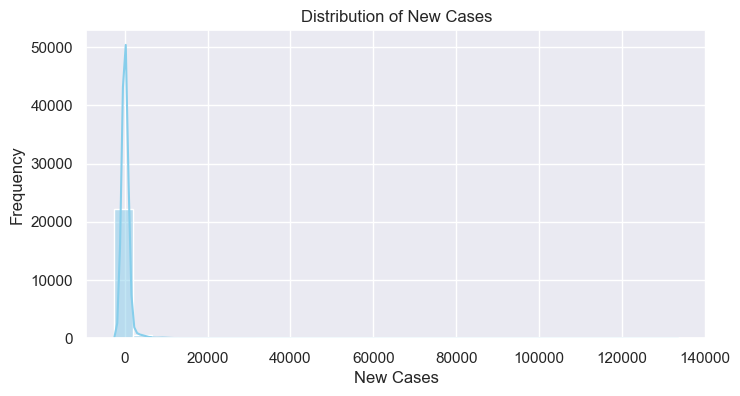

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='new_cases', kde=True, bins=30, color='skyblue')
plt.title('Distribution of New Cases')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


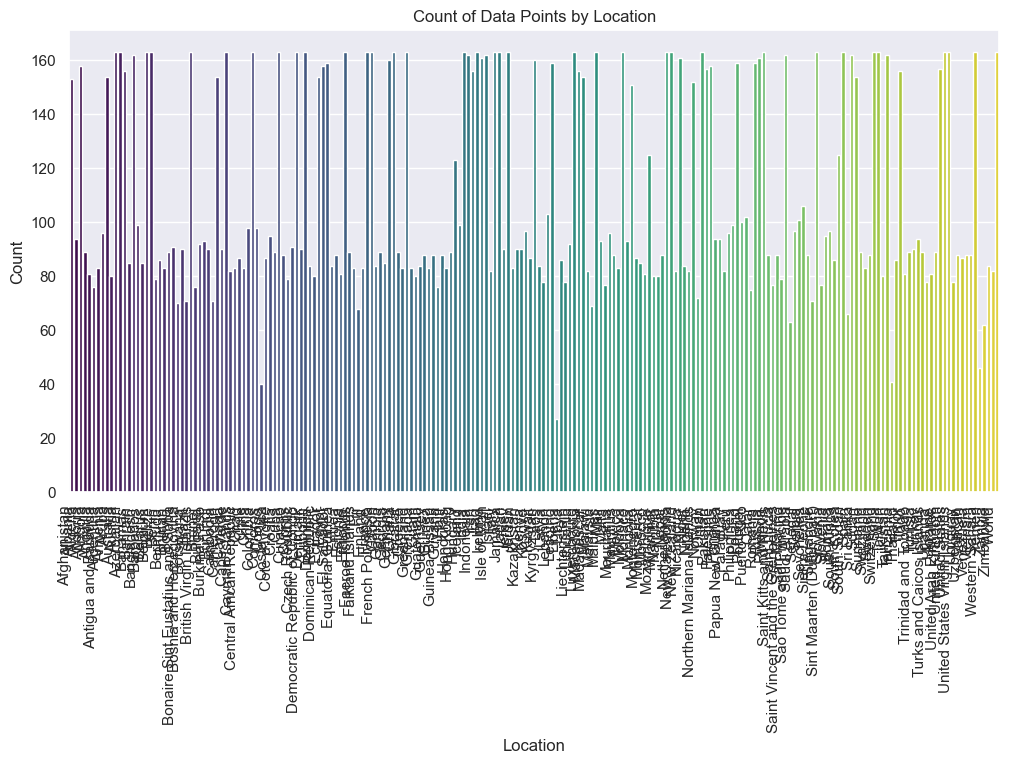

In [35]:
# Bar chart for categorical variable 'location'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='location', palette='viridis')
plt.title('Count of Data Points by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


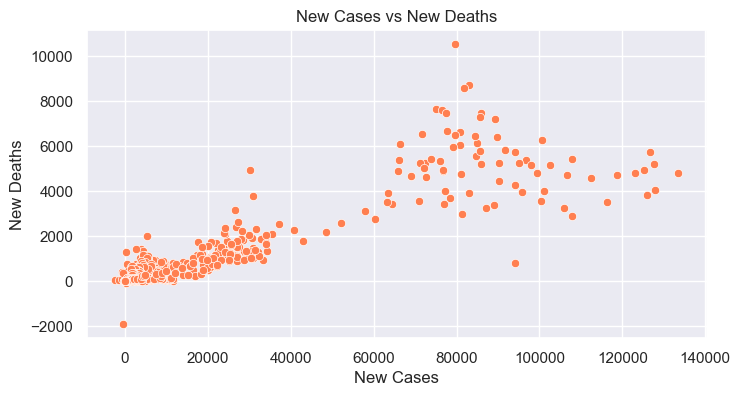

In [24]:
# Scatter plot for relationship between 'new_cases' and 'new_deaths'
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='new_cases', y='new_deaths', color='coral')
plt.title('New Cases vs New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.show()

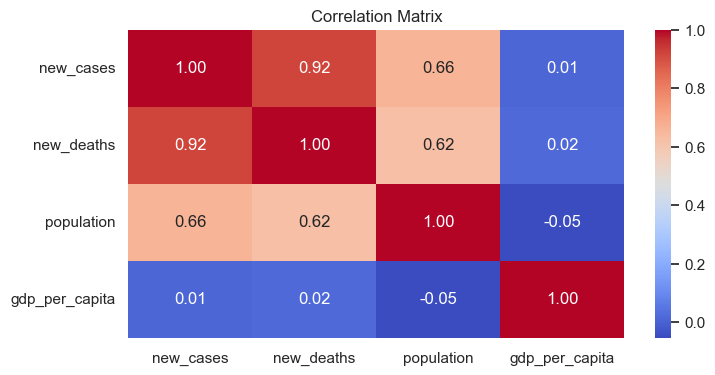

In [23]:
# Correlation matrix for numerical variables
correlation_matrix = df[['new_cases', 'new_deaths', 'population', 'gdp_per_capita']].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

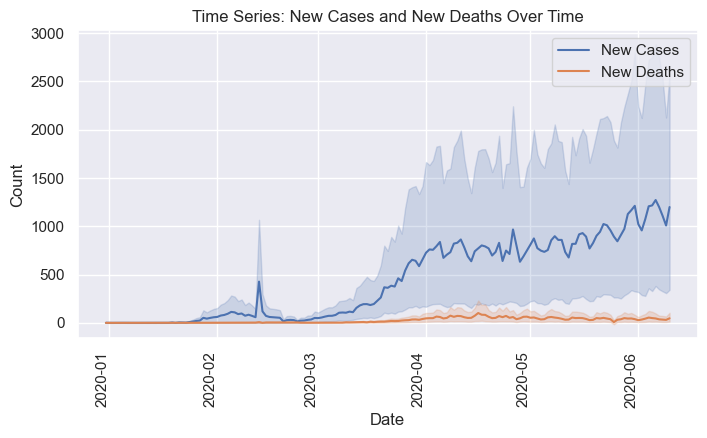

In [26]:
# Time series plot for 'new_cases' and 'new_deaths'
plt.figure(figsize=(8, 4))
sns.lineplot(data=df, x='date', y='new_cases', label='New Cases')
sns.lineplot(data=df, x='date', y='new_deaths', label='New Deaths')
plt.title('Time Series: New Cases and New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [46]:
# Create a new feature 'death_rate' with improved error handling
df['death_rate'] = np.where((df['new_cases'] != 0) & ~np.isnan(df['new_deaths']), df['new_deaths'] / df['new_cases'], 0)

In [44]:
# Create a new feature 'hospital_beds_density'
df['hospital_beds_density'] = df['hospital_beds_per_thousand'] / df['population']

In [47]:
df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,aged_65_older_missing,year,month,day,death_rate,hospital_beds_density
0,Afghanistan,2019-12-31,0,0,38928341,2.581,1803.987,0.5,0,2019,12,31,0.0,1.284411e-08
1,Afghanistan,2020-01-01,0,0,38928341,2.581,1803.987,0.5,0,2020,1,1,0.0,1.284411e-08
2,Afghanistan,2020-01-02,0,0,38928341,2.581,1803.987,0.5,0,2020,1,2,0.0,1.284411e-08
3,Afghanistan,2020-01-03,0,0,38928341,2.581,1803.987,0.5,0,2020,1,3,0.0,1.284411e-08
4,Afghanistan,2020-01-04,0,0,38928341,2.581,1803.987,0.5,0,2020,1,4,0.0,1.284411e-08


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


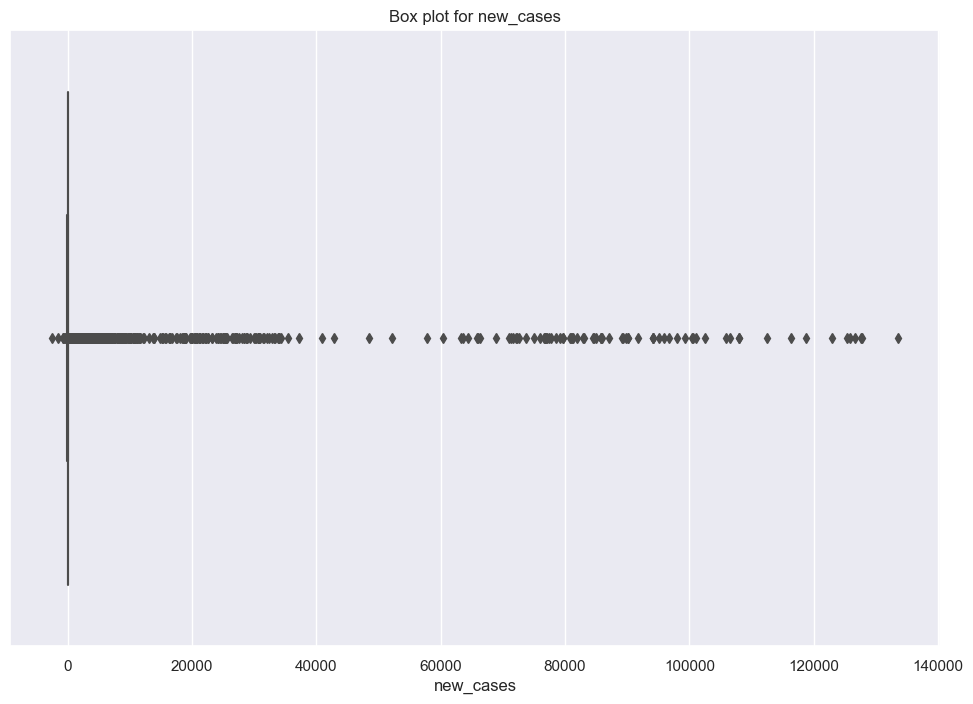

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


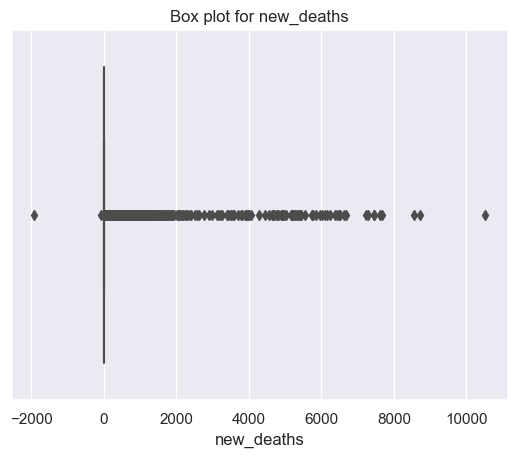

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


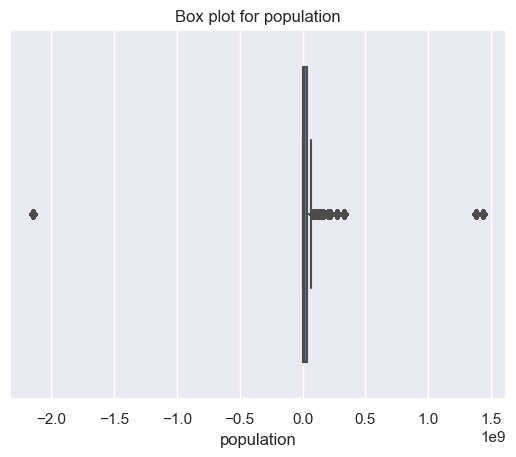

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


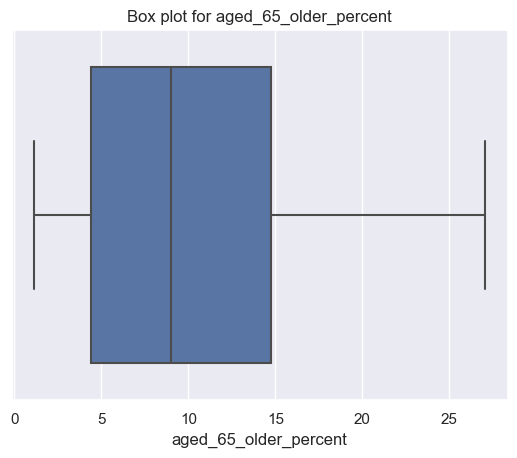

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


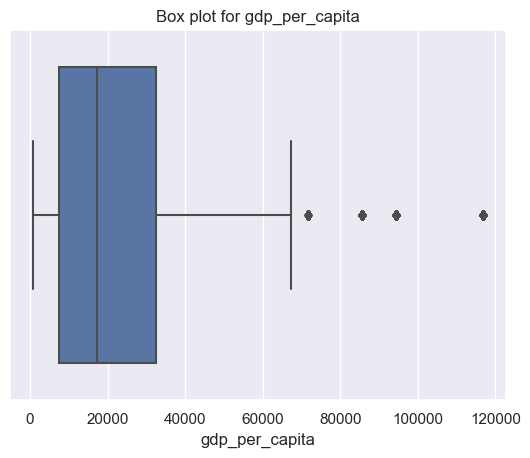

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


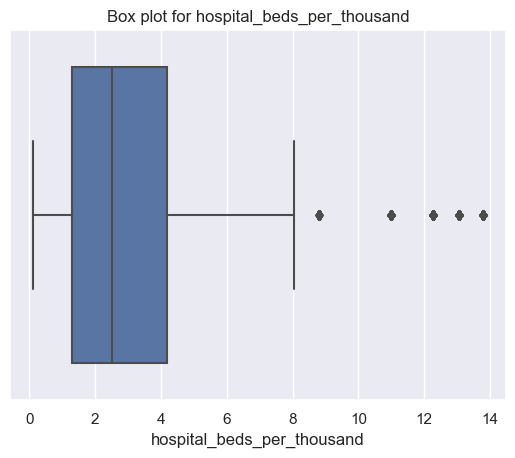

In [48]:
# Visualize outliers for numerical variables
numerical_columns = ['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']

# Create box plots
plt.figure(figsize=(12, 8))
for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot for {column}')
    plt.show()


In [49]:
from scipy.stats import mstats

# Winsorize numerical variables
winsorized_df = df.copy()
for column in numerical_columns:
    winsorized_df[column] = mstats.winsorize(df[column], limits=[0.05, 0.05])

# Display the modified DataFrame
print(winsorized_df.head())


      location       date  new_cases  new_deaths  population  \
0  Afghanistan 2019-12-31          0           0    38928341   
1  Afghanistan 2020-01-01          0           0    38928341   
2  Afghanistan 2020-01-02          0           0    38928341   
3  Afghanistan 2020-01-03          0           0    38928341   
4  Afghanistan 2020-01-04          0           0    38928341   

   aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  \
0                  2.581        1803.987                         0.5   
1                  2.581        1803.987                         0.5   
2                  2.581        1803.987                         0.5   
3                  2.581        1803.987                         0.5   
4                  2.581        1803.987                         0.5   

   aged_65_older_missing  year  month  day  death_rate  hospital_beds_density  
0                      0  2019     12   31         0.0           1.284411e-08  
1                     

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

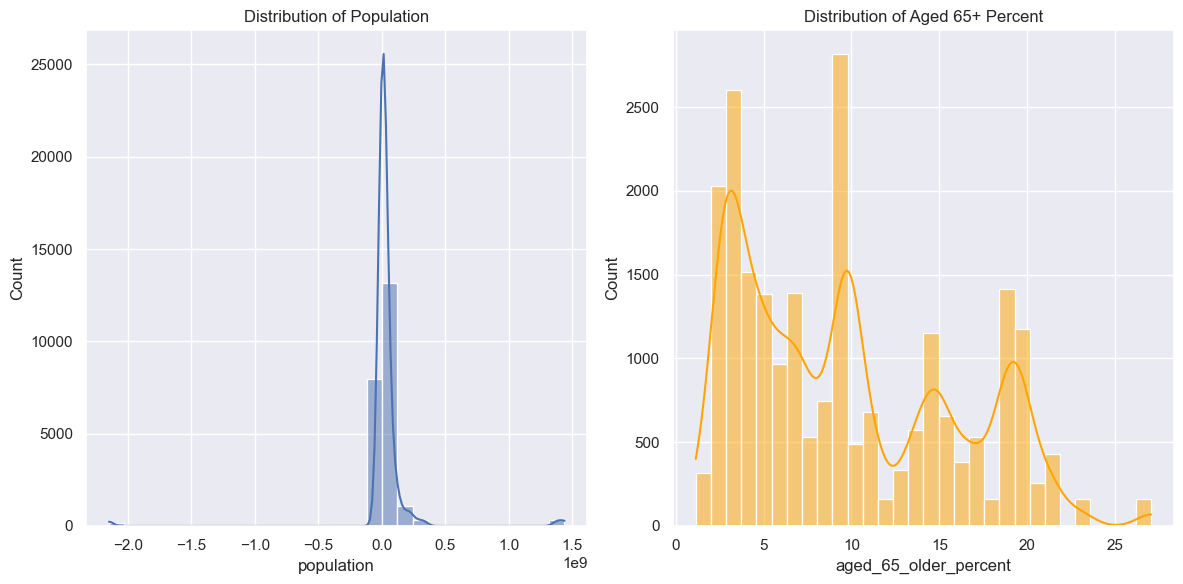

In [50]:
# Distribution of population and aged_65_older_percent
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['population'], bins=30, kde=True)
plt.title('Distribution of Population')

plt.subplot(1, 2, 2)
sns.histplot(df['aged_65_older_percent'], bins=30, kde=True, color='orange')
plt.title('Distribution of Aged 65+ Percent')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


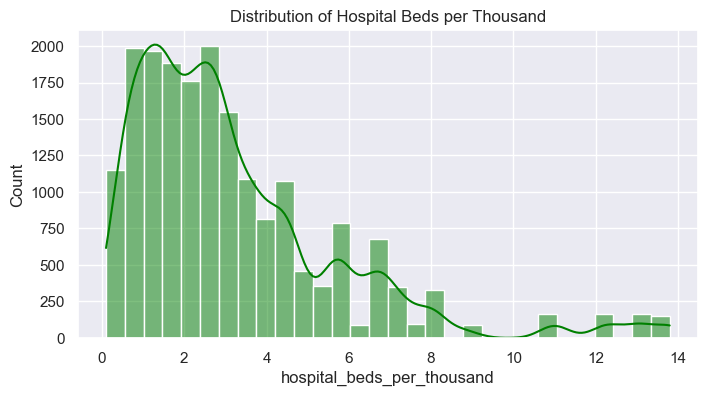

In [20]:
# Distribution of hospital_beds_per_thousand
plt.figure(figsize=(8, 4))
sns.histplot(df['hospital_beds_per_thousand'], bins=30, kde=True, color='green')
plt.title('Distribution of Hospital Beds per Thousand')
plt.show()

In [13]:
df.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,year,month,day
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,2019,12,31
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,2020,1,1
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,2020,1,2
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,2020,1,3
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,2020,1,4


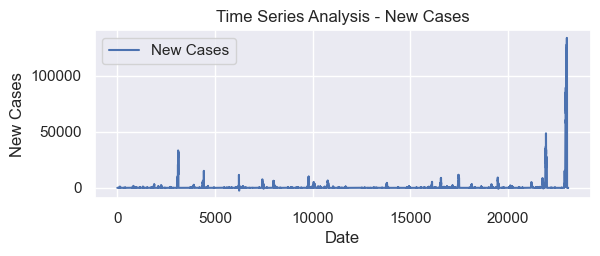

In [14]:
# Plot new cases over time
plt.subplot(2, 1, 1)
plt.plot(df['new_cases'], label='New Cases')
plt.title('Time Series Analysis - New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()

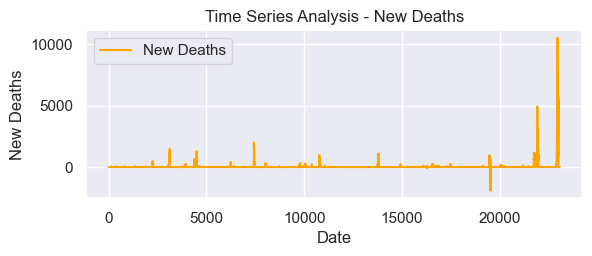

In [17]:
# Plot new deaths over time
plt.subplot(2, 1, 2)
plt.plot(df['new_deaths'], label='New Deaths', color='orange')
plt.title('Time Series Analysis - New Deaths')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()

In [10]:
import pandas as pd

# Assuming 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by 'date' and calculate the mean of numerical columns (e.g., 'new_cases', 'new_deaths')
daily_mean_data = df.groupby(df['date'].dt.date)[['new_cases', 'new_deaths']].mean()

# Convert the result to DataFrame for better visualization or further analysis
daily_mean_data_df = daily_mean_data.reset_index()

# Display the result
print(daily_mean_data_df)


           date    new_cases  new_deaths
0    2019-12-31     0.794118    0.000000
1    2020-01-01     0.000000    0.000000
2    2020-01-02     0.000000    0.000000
3    2020-01-03     0.500000    0.000000
4    2020-01-04     0.000000    0.000000
..          ...          ...         ...
158  2020-06-06  1271.523810   45.561905
159  2020-06-07  1198.685714   36.400000
160  2020-06-08  1107.790476   33.371429
161  2020-06-09  1008.104762   30.761905
162  2020-06-10  1198.861244   47.167464

[163 rows x 3 columns]


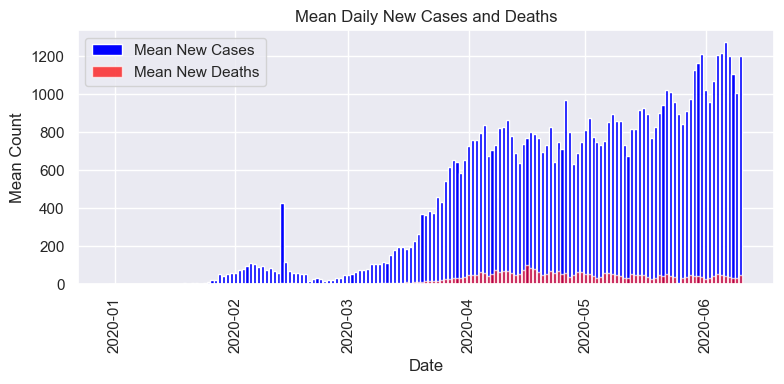

In [11]:
# Plotting
plt.figure(figsize=(8, 4))

plt.bar(daily_mean_data_df['date'], daily_mean_data_df['new_cases'], label='Mean New Cases', color='blue')
plt.bar(daily_mean_data_df['date'], daily_mean_data_df['new_deaths'], label='Mean New Deaths', color='red', alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Mean Count')
plt.title('Mean Daily New Cases and Deaths')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

C:\Users\JKFX\AppData\Local\Temp\ipykernel_9832\251353458.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


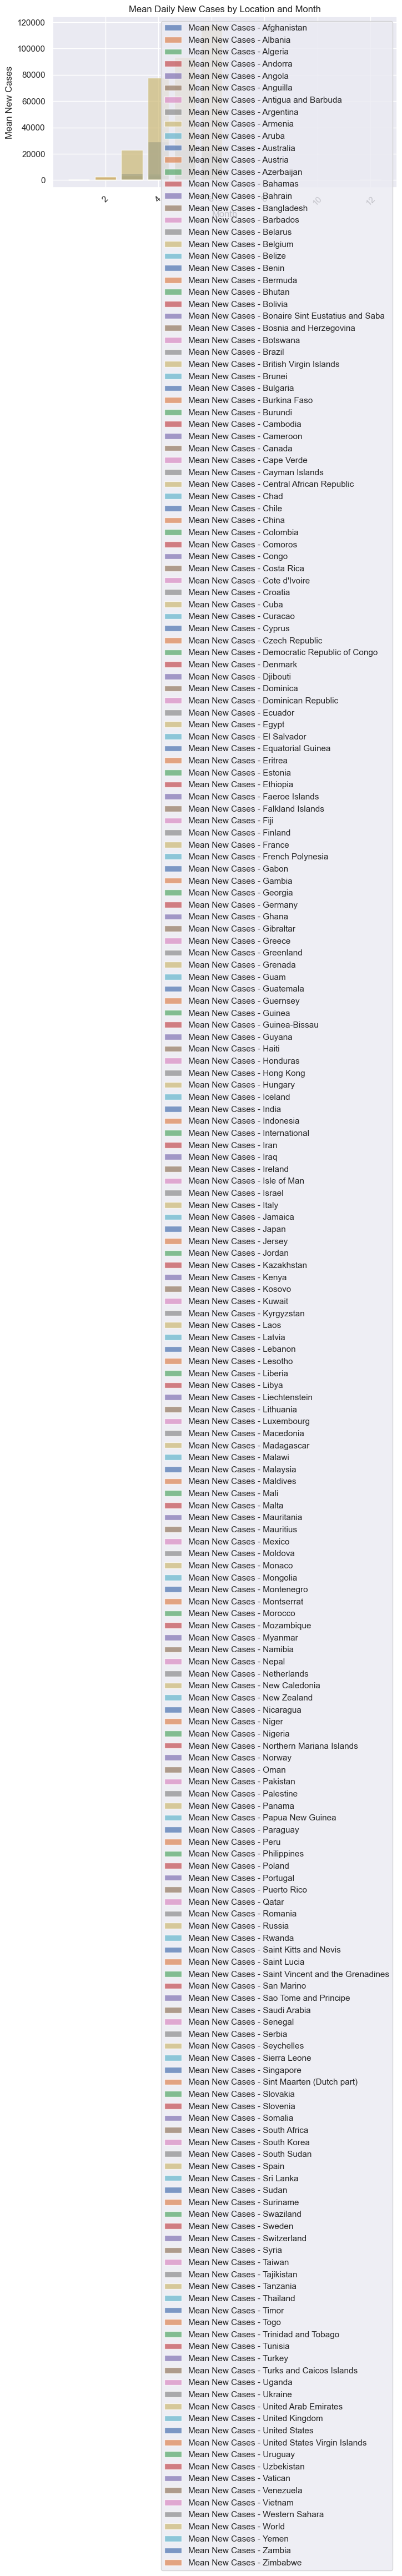

In [16]:
# Group by 'location' and 'month' and calculate the mean of numerical columns
grouped_data = df.groupby(['location', 'month'])[['new_cases', 'new_deaths']].mean()

# Reset index for better visualization or further analysis
grouped_data_df = grouped_data.reset_index()

# Plotting
plt.figure(figsize=(8, 4))

# Loop through unique locations and plot a bar for each location
for location in grouped_data_df['location'].unique():
    location_data = grouped_data_df[grouped_data_df['location'] == location]
    plt.bar(location_data['month'], location_data['new_cases'], label=f'Mean New Cases - {location}', alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Mean New Cases')
plt.title('Mean Daily New Cases by Location and Month')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


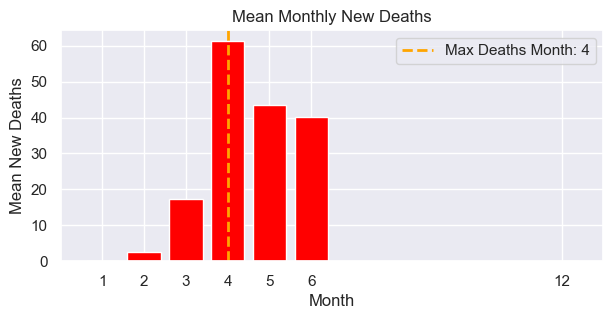

In [8]:
# Group by 'month' and calculate the mean of new deaths
monthly_mean_deaths = df.groupby('month')['new_deaths'].mean().reset_index()

# Find the month with the highest mean death cases
max_deaths_month = monthly_mean_deaths.loc[monthly_mean_deaths['new_deaths'].idxmax(), 'month']

# Plotting
plt.figure(figsize=(7, 3))
plt.bar(monthly_mean_deaths['month'], monthly_mean_deaths['new_deaths'], color='red')  # Use 'red' for death cases
plt.xlabel('Month')
plt.ylabel('Mean New Deaths')  # Update ylabel to reflect deaths
plt.title('Mean Monthly New Deaths')  # Update title
plt.xticks(monthly_mean_deaths['month'])
plt.axvline(max_deaths_month, color='orange', linestyle='dashed', linewidth=2, label=f'Max Deaths Month: {max_deaths_month}')
plt.legend()
plt.show()

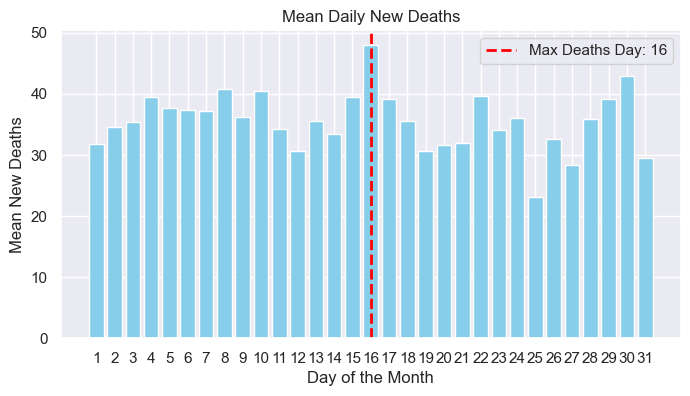

In [10]:
# Group by 'day' and calculate the mean of new deaths
daily_mean_deaths = df.groupby('day')['new_deaths'].mean().reset_index()

# Find the day with the highest mean new deaths
max_death_day = daily_mean_deaths.loc[daily_mean_deaths['new_deaths'].idxmax(), 'day']

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(daily_mean_deaths['day'], daily_mean_deaths['new_deaths'], color='skyblue')
plt.xlabel('Day of the Month')
plt.ylabel('Mean New Deaths')
plt.title('Mean Daily New Deaths')
plt.xticks(daily_mean_deaths['day'])
plt.axvline(max_death_day, color='red', linestyle='dashed', linewidth=2, label=f'Max Deaths Day: {max_death_day}')
plt.legend()
plt.show()


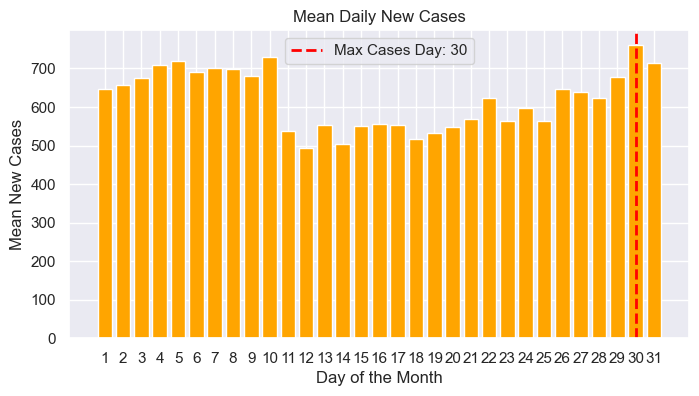

In [13]:
# Group by 'day' and calculate the mean of new cases
daily_mean_cases = df.groupby('day')['new_cases'].mean().reset_index()

# Find the day with the highest mean new cases
max_cases_day = daily_mean_cases.loc[daily_mean_cases['new_cases'].idxmax(), 'day']

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(daily_mean_cases['day'], daily_mean_cases['new_cases'], color='orange')
plt.xlabel('Day of the Month')
plt.ylabel('Mean New Cases')
plt.title('Mean Daily New Cases')
plt.xticks(daily_mean_cases['day'])
plt.axvline(max_cases_day, color='red', linestyle='dashed', linewidth=2, label=f'Max Cases Day: {max_cases_day}')
plt.legend()
plt.show()



In [13]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Convert 'aged_65_older_percent' to string and handle missing values
df['aged_65_older_percent'] = df['aged_65_older_percent'].astype(str).replace('nan', 'missing')

# Create a new column for combined groups
df['location_age_group'] = df['location'] + '_' + df['aged_65_older_percent']

# Now you can use this new column for grouping
grouped_data = df.groupby('location_age_group')['new_cases'].sum().reset_index()

# Print or visualize the result
print(grouped_data)


         location_age_group  new_cases
0         Afghanistan_2.581      21459
1            Albania_13.188       1299
2             Algeria_6.211      10382
3           Andorra_missing        852
4              Angola_2.405         96
..                      ...        ...
207  Western Sahara_missing         23
208             World_8.696    7210462
209             Yemen_2.922        524
210             Zambia_2.48       1200
211          Zimbabwe_2.822        314

[212 rows x 2 columns]


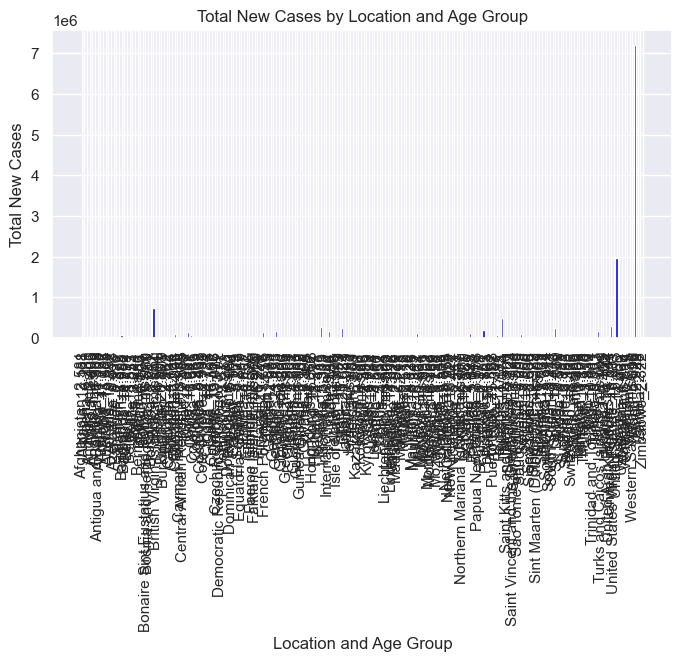

In [15]:
# Plotting
plt.figure(figsize=(8, 4))
plt.bar(grouped_data['location_age_group'], grouped_data['new_cases'], color='blue')
plt.xlabel('Location and Age Group')
plt.ylabel('Total New Cases')
plt.title('Total New Cases by Location and Age Group')
plt.xticks(rotation=90)
plt.show()

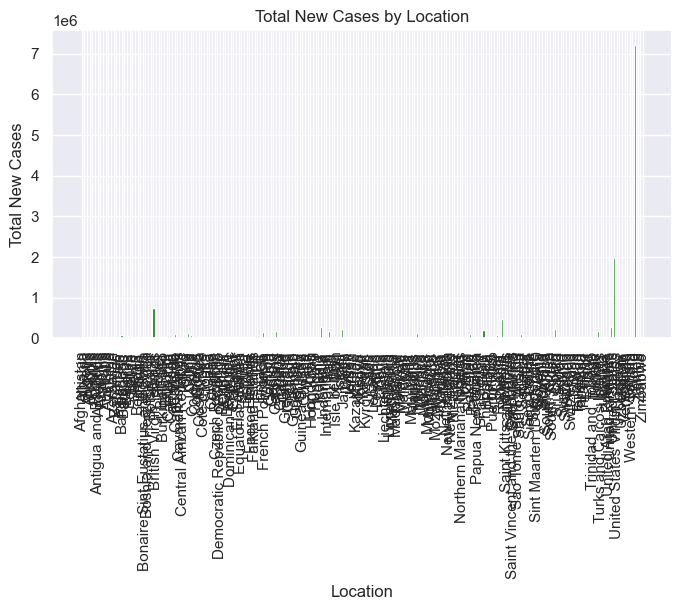

In [17]:
# Now you can use the 'location' column for grouping
grouped_data_location = df.groupby('location')['new_cases'].sum().reset_index()

# Plotting for location
plt.figure(figsize=(8, 4))
plt.bar(grouped_data_location['location'], grouped_data_location['new_cases'], color='green')
plt.xlabel('Location')
plt.ylabel('Total New Cases')
plt.title('Total New Cases by Location')
plt.xticks(rotation=90)
plt.show()


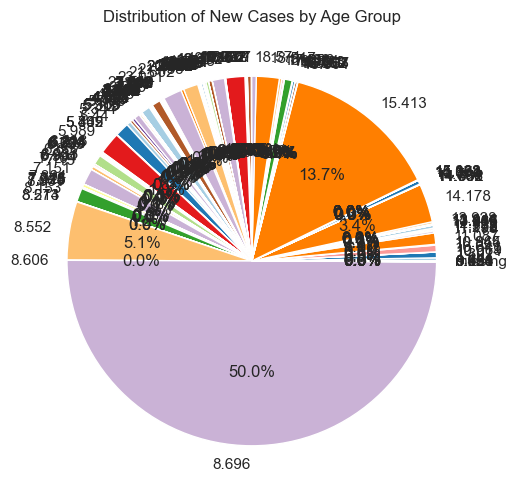

In [23]:
# Convert 'aged_65_older_percent' to string and handle missing values
df['aged_65_older_percent'] = df['aged_65_older_percent'].astype(str).replace('nan', 'missing')

# Now you can use the 'aged_65_older_percent' column for grouping
grouped_data_age_group = df.groupby('aged_65_older_percent')['new_cases'].sum().reset_index()

# Plotting for age group as a pie chart
plt.figure(figsize=(12, 6))
plt.pie(grouped_data_age_group['new_cases'], labels=grouped_data_age_group['aged_65_older_percent'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of New Cases by Age Group')
plt.show()



In [21]:
# Now you can use the 'location' column for grouping
grouped_data_country = df.groupby('location')[['new_cases', 'new_deaths']].sum().reset_index()



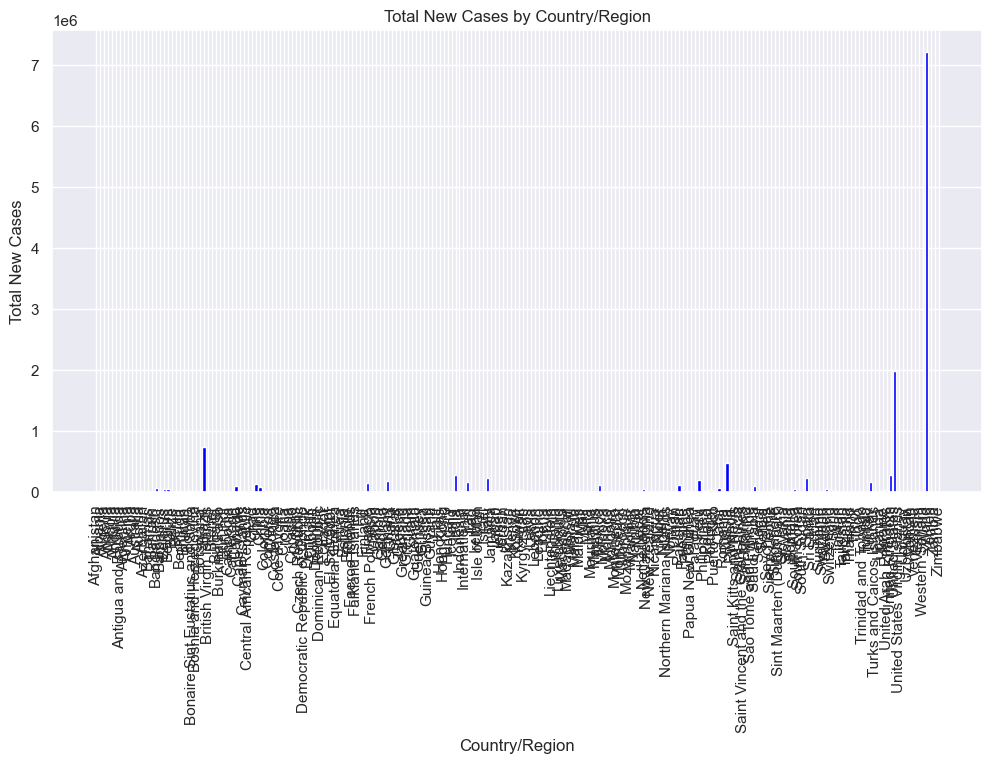

In [22]:
# Plotting for new cases by country
plt.figure(figsize=(12, 6))
plt.bar(grouped_data_country['location'], grouped_data_country['new_cases'], color='blue')
plt.xlabel('Country/Region')
plt.ylabel('Total New Cases')
plt.title('Total New Cases by Country/Region')
plt.xticks(rotation=90)
plt.show()

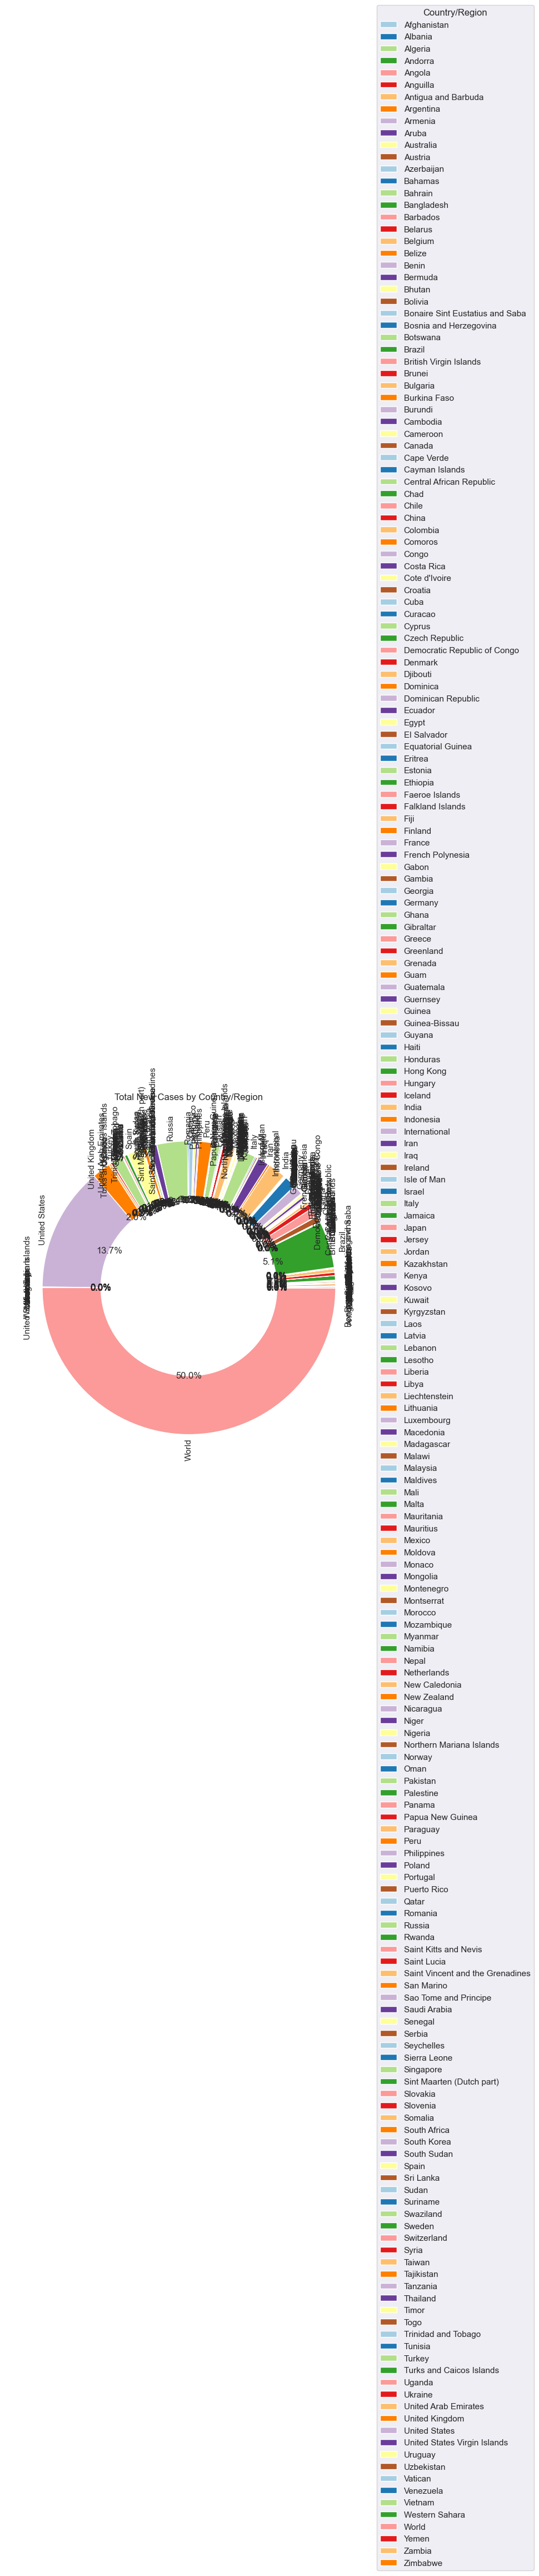

In [32]:
# Plotting for new cases by country
plt.figure(figsize=(12, 12))
colors = plt.cm.Paired.colors

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    grouped_data_country['new_cases'],
    labels=grouped_data_country['location'],
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Add a legend
plt.legend(wedges, grouped_data_country['location'], title='Country/Region', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Make the regions circle around the chart
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.65)

# Adjust label rotation
for text in texts:
    text.set_rotation(90)
    text.set_ha('center')

plt.title('Total New Cases by Country/Region')
plt.show()
